# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# additional imports if necessary

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [29]:
# your code here
def calculate_mean_and_std(df,Y):
  labels = sorted(list(df[Y].unique()))
  flist=list(df.columns)[:-1]
  l1=[]
  l2=[]
  ind=0
  for i in labels:
    df1=df[df[Y]==i]
    l1.append([])
    l2.append([])

    for j in flist:
      l1[ind].append(df1[j].mean())
      l2[ind].append(df1[j].std())
    ind=ind+1
  return l1,l2



### Calculate priors

Write a function to calculate the priors for each class.

In [30]:
# your code here
def funprior(df, Y):
    ds = sorted(list(df[Y].unique()))
    p = []
    for i in ds:
        v=len(df[df[Y]==i])/len(df)
        p.append(v)
    return p

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [31]:
def calculate_likelihood_gaussian(df, mean,std, dataval ):
    val = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(0-((dataval-mean)**2 / (2 * std**2 )))
    return val
class naive_bayes_gaussian:
  
  def fit(self,df,label_name):
    self.df=df
    self.features = list(df.columns)[:-1]
    self.label_name=label_name
    self.prior = funprior(df, label_name)
    self.meanlist,self.stdlist=calculate_mean_and_std(df,label_name)
    self.labels=sorted(list(df[label_name].unique()))
  def predict(self,X):
    df=self.df
    label_name=self.label_name
    prior=self.prior
    Y_pred = []
    features=self.features 
    meanlist=self.meanlist
    stdlist=self.stdlist
    
    lab=self.labels
    for x in X:
        
        likelihood = [1]*len(lab)
        for j in range(len(lab)):
            df1 = df[df[label_name]==lab[j]]
            for i in range(len(features)):
                mean= meanlist[j][i]
                std=stdlist[j][i]
                likelihood[j] *= calculate_likelihood_gaussian(df1,mean,std, x[i])
        val=0
        ind=1
        for j in range(len(lab)):
            px = likelihood[j] * prior[j]
            if(val<px):
              val=px
              ind=j+1

        Y_pred.append(ind)

    return np.array(Y_pred) 

    



### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [32]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')
print(type(data))


<class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ws1     2000 non-null   int64
 1   ws2     2000 non-null   int64
 2   ws3     2000 non-null   int64
 3   ws4     2000 non-null   int64
 4   ws5     2000 non-null   int64
 5   ws6     2000 non-null   int64
 6   ws7     2000 non-null   int64
 7   r       2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


<AxesSubplot:>

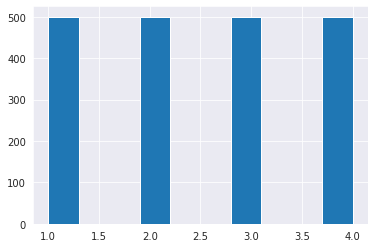

In [33]:
# your code here
data.describe()
data.info()
data["r"].hist()

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [34]:
# your code here
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.25, random_state=1)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values


### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

In [35]:
# your code here
model=naive_bayes_gaussian()
model.fit(train,'r')



<AxesSubplot:xlabel='ws7', ylabel='Count'>

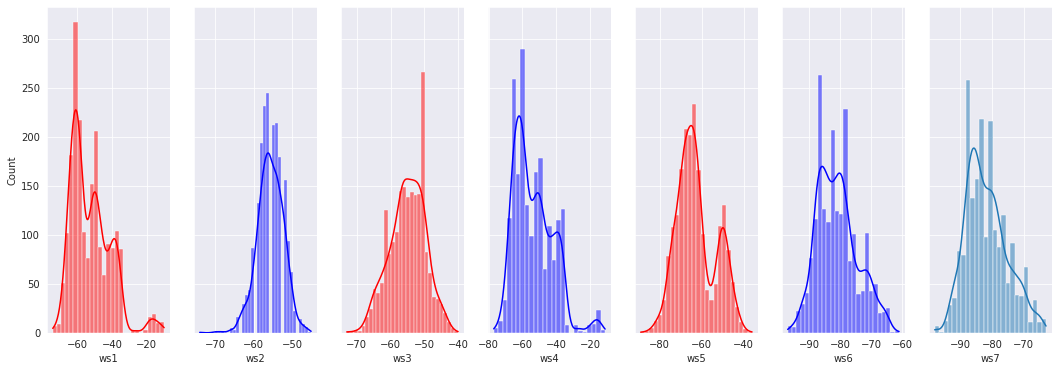

In [36]:

import seaborn as sns
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 7, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="ws1", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="ws2", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="ws3", kde=True,color='r')
sns.histplot(data, ax=axes[3], x="ws4", kde=True, color='b')
sns.histplot(data, ax=axes[4], x="ws5", kde=True, color='r')
sns.histplot(data, ax=axes[5], x="ws6", kde=True,color='b')

sns.histplot(data, ax=axes[6], x="ws7", kde=True)


In [37]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.99


Accuracy: 0.9666666666666667


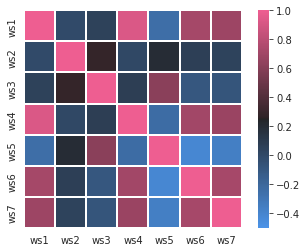

In [39]:
import seaborn as sns
sns.set_style("darkgrid")
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)
data1= data[["ws1", "ws2","ws5", "r"]]
from sklearn.model_selection import train_test_split
train, test = train_test_split(data1, test_size=.15, random_state=1)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
from sklearn.metrics import accuracy_score
model=naive_bayes_gaussian()
model.fit(train,'r')

y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataa=data[["ws1","r"]]
datab=data[["ws2","r"]]
datac=data[["ws3","r"]]

datad=data[["ws4","r"]]
datae=data[["ws5","r"]]
dataf=data[["ws6","r"]]
datag=data[["ws7","r"]]
l=[dataa,datab,datac,datad,datae,dataf,datag]
j=1
for i in l:
  train, test = train_test_split(i, test_size=.20, random_state=1)

  X_test = test.iloc[:,:-1].values
  Y_test = test.iloc[:,-1].values
  
  model=naive_bayes_gaussian()
  model.fit(train,'r')

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(Y_test, y_pred)
  print('Accuracy for:',j,"is=", accuracy)
  j=j+1

Accuracy for: 1 is= 0.815
Accuracy for: 2 is= 0.2875
Accuracy for: 3 is= 0.5125
Accuracy for: 4 is= 0.72
Accuracy for: 5 is= 0.595
Accuracy for: 6 is= 0.5925
Accuracy for: 7 is= 0.56


In [41]:
from sklearn.naive_bayes import GaussianNB
datamod=data
train, test = train_test_split(datamod, test_size=.20, random_state=42)
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values
X_test = train.iloc[:,:-1].values
Y_test = train.iloc[:,-1].values
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.983125
